In [2]:
!pip install scikit-plot

###**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np

import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt #visualization
import matplotlib
import math
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib
import seaborn as sns #visualization

###**Import your dataset**

In [5]:
#reading the .xlsx dataset in to the dataframe
df = pd.read_excel("AIDA-Dataset.xlsx")

###**Data preprossesing**

In [6]:
short_names_mapping = {
    'Do you want to participate in this survey?': 'Participation',
    'Please state your age? (e.g. 25)': 'Age',
    'What is your gender?': 'Gender',
    'What degree are you currently pursuing?': 'Degree',
    'What is your current academic year? (e.g. 2)': 'AcademicYear',
    'Which medium of school have you come from?': 'SchoolMedium',
    'Which department do you study in?': 'Department',
    'What is your current cumulative grade points average (CGPA)?': 'CGPA',
    'Do you have any personal history of depression?': 'DepressionHistory',
    'What is your current relationship status?': 'RelationshipStatus',
    'What is your religion?': 'Religion',
    'What is your current place of residence?': 'Residence',
    'Currently I live - ': 'CurrentLocation',
    'Number of siblings (e.g. 2)': 'SiblingsCount',
    'What is your ordinal position/birth order among your siblings? (e.g. 1)': 'SiblingOrder',
    ' [I feel that I have additional responsibility to be in this position.]': 'ResponsibilityFeeling',
    'What is your father’s occupation? (If you do not see the occupation listed below or in case of a deceased father please choose the "other" option.)': 'FatherOccupation',
    'What is your mother’s occupation? (If you do not see the occupation listed below or in case of a deceased mother please choose the "other" option.)': 'MotherOccupation',
    'What is your family’s (household) average monthly income? (e.g. 2000)': 'FamilyIncome',
    'Do you have any financial hardship currently?': 'FinancialHardship',
    'Is your family financially dependent on you?': 'FinancialDependency',
    'Do you have anyone in your family who has been suffering from fatal diseases?': 'FamilyIllness',
    ' [How often do you communicate with your parents?]': 'ParentalCommunicationFrequency',
    'Give your opinion about these: [My parents are very strict about my daily life style]': 'ParentalStrictness',
    'Give your opinion about these: [My parents give pressure for my academic subject selection]': 'ParentalAcademicPressure',
    'Give your opinion about these: [My parents give pressure for my marriage.]': 'ParentalMarriagePressure',
    'Give your opinion about these: [My parents give pressure for my career choice.]': 'ParentalCareerPressure',
    'Give your opinion about these: [My parents give pressure regarding my decision on studying abroad]': 'ParentalStudyAbroadPressure',
    'Give your opinion about these statements [I have bad understanding with my parents]': 'ParentalUnderstanding',
    'Give your opinion about these statements [I have bad bonding with my siblings]': 'SiblingBonding',
    'Give your opinion about these statements [My  parents have unstable relationship]': 'ParentalRelationshipStability',
    'Give your opinion about these statements [I don’t get along with most of my classmates/friends]': 'PeerRelationship',
    'Give your opinion about these statements [My university teachers are unsupportive]': 'TeacherSupport',
    'Give your opinion about these statements [An unstable relationship with my partner affects my life.]': 'PartnerRelationshipImpact',
    'Give your opinion about these statements [A discouraging working environment (colleague/boss) affects the output of my work.]': 'WorkEnvironmentImpact',
    ' [I feel society interferes with my freedom of expression (freedom of speech / movement / etc...)]': 'SocietalInterference',
    'Have you ever experienced this sort of violence before? [I have faced Physical Violence before. (someone uses his/her body part or an object to control my actions) (শারিরিকনির্যাতন)]': 'PhysicalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Sexual Violence before. (i am/was forced to unwillingly take part in sexual activity) (যৌনসহিংসতা)]': 'SexualViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Verbal Violence before. (someone uses language, whether spoken or written as an abusing tool against me) (মৌখিকগালি)]': 'VerbalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Emotional Violence before. (someone says or does something to make me feel stupid or worthless) (মানসিকহিংসা)]': 'EmotionalViolenceExperience',
    'What kind of institution do you study in?': 'InstitutionType',
    'Self-perception on Academic status: [My academic performance is very poor.]': 'PoorAcademicPerformanceSelfPerception',
    'Self-perception on Academic status: [I have been criticized for my academic result.]': 'AcademicCriticismSelfPerception',
    'Self-perception on Academic status: [I am unsatisfied with my academic workload (i.e., presentations, assignments, tutorials)]': 'UnsatisfiedAcademicWorkloadSelfPerception',
    'Give your opinion for these: [I am not studying in my subject of interest.]': 'NonInterestSubjectOpinion',
    'Give your opinion for these: [I am unhappy with the subject that I am studying.]': 'UnhappySubjectOpinion',
    'Give your opinion for these: [I am not studying in the institution of my interest.]': 'NonInterestInstitutionOpinion',
    'Give your opinion for these: [I am unhappy with the institution that I am studying.]': 'UnhappyInstitutionOpinion',
    'Did you select the subject due to career prospects only?': 'CareerProspectsSubjectSelection',
    'What is your current employment status?': 'EmploymentStatus',
    'Which of the following is true for you?': 'PersonalSituation',
    'How the pandemic is affecting your full time /part time job/tutoring?': 'PandemicImpactOnWork',
    'I am satisfied with my current job.': 'JobSatisfaction',
    'My family/partner is satisfied with my current job.': 'FamilyPartnerJobSatisfaction',
    ' [In my opinion, enough jobs are not available related to my pursued subject. (your academic subject )]': 'InsufficientJobsSubjectOpinion',
    'How many close friends (approximately) do you have? (e.g. 3)': 'CloseFriendsCount',
    ' [How often do you hang out with your friends?]': 'FriendHangoutFrequency',
    'Are you involved in any extracurricular activities?': 'ExtracurricularInvolvement',
    'How strongly do you agree with each of the following questions: [How often do you smoke?]': 'SmokingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you take drugs?]': 'DrugUseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you drink alcohol?]': 'AlcoholConsumptionFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you engage in physical exercise?]': 'PhysicalExerciseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you practice religious activities?]': 'ReligiousActivitiesFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play video games?]': 'VideoGamePlayingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play sports?]': 'SportsPlayingFrequencyPerception',
    'On average how many hours do you spend in social media? (e.g. 5)': 'SocialMediaUsageHours',
    'Give your opinion on these: [The success stories of my peers in social media sometimes pose negative impact on me]': 'PeerSuccessImpactOnSocialMediaOpinion',
    'Give your opinion on these: [Social media has negative influence on my purchase decision]': 'SocialMediaInfluenceOnPurchaseDecisionOpinion',
    "Give your opinion on these: [I find human bonding less trust-worthy because it's easy to become imposters on social media]": 'TrustInHumanBondingOnSocialMediaOpinion',
    'Give your opinion on these: [I feel numbness of feelings as I am constantly seeing variety of incidents on social media.]': 'NumbnessFeelingsDueToSocialMediaOpinion',
    'Give your opinion on these: [I like to interact with my friends in person rather than in virtual mode.]': 'PreferenceForInPersonInteractionOpinion',
    'Sad': 'Sadness',
    'Depressed mood (sadness, hopeless, helpless, worthless)': 'DepressedMood',
    'Future': 'FutureOutlook',
    'Failure': 'FearOfFailure',
    'Satisfaction': 'SatisfactionLevel',
    'Guilty ': 'FeelingsOfGuilt',
    'Feelings of guiltiness ': 'GuiltFeelings',
    'Punished': 'FeelingsOfPunishment',
    'Disappointment ': 'FeelingsOfDisappointment',
    'Blame on me': 'SelfBlame',
    'Cry ': 'TendencyToCry',
    'Irritated': 'Irritability',
    'Interest in other people': 'InterestInOthers',
    'Decisions': 'DecisionMaking',
    'Look': 'AppearanceConcern',
    'Self-Care (This question is pertaining to what you feeling right now)': 'SelfCarePerception',
    'Energy Level:': 'EnergyLevel',
    'Work and Activities': 'WorkAndActivitiesLevel',
    'Sleep ': 'SleepQuality',
    'Sleeping Too Much:': 'ExcessiveSleeping',
    'Tired': 'Fatigue',
    'Appetite': 'AppetiteLevel',
    'a)\tAccording to you:': 'SubjectiveHealthPerception',
    'b)\tAccording to weekly measurements:': 'ObjectiveHealthPerception',
    'Feelings of suicide': 'SuicidalFeelings',
    'Retardation (প্রতিবন্ধকতা) (slowness of thought and speech, impaired ability to concentrate, decreased motor activity)/ (চিন্তা , কথা , মনোযোগ , মস্তিষ্কের কর্মক্ষমতা হ্রাস)': 'CognitiveRetardation',
    'Agitation (feeling of irritability or severe restlessness) (উত্কণ্ঠা)': 'Agitation',
    'Anxiety Psychic (মানসিক দুশ্চিন্তা)': 'PsychicAnxiety',
    ' [I felt that I was rather touchy/oversensitive over the past week]': 'SensitivityPerception',
    ' [I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)]': 'HeartAwarenessPerception',
    'ANXIETY SOMATIC (দৈহিক) (physiological concomitants of anxiety) such as\ngastro-intestinal – dry mouth, wind, indigestion (বদ হজম), diarrhea, cramps ( পেটে ব্যাথা), belching( বমি)\ncardio-vascular – palpitations ( বুক ধড়ফড়) , headaches\nrespiratory – hyperventilation ( জোরে জোরে শ্বাস নেয়া), sighing urinary frequency sweating': 'SomaticAnxietySymptoms',
    'Somatic Symptoms Gastro-Intestinal': 'GastrointestinalSymptoms',
    'General Somatic Symptoms': 'GeneralSomaticSymptoms',
    'Genital Symptoms (symptoms such as loss of libido, menstrual disturbances)': 'GenitalSymptoms',
    'Hypochondriasis (The belief and fear of serious illness) / ( মরণব্যাধি আছে এমন ভ্রান্ত ধারনা )': 'Hypochondriasis',
    'Insight (self-perception)': 'SelfPerception',
}
df.rename(columns=short_names_mapping, inplace=True)


In [7]:
df.columns.tolist()

['Participation',
 'Age',
 'Gender',
 'Degree',
 'AcademicYear',
 'SchoolMedium',
 'Department',
 'CGPA',
 'DepressionHistory',
 'RelationshipStatus',
 'Religion',
 'Residence',
 'CurrentLocation',
 'SiblingsCount',
 'SiblingOrder',
 'ResponsibilityFeeling',
 'FatherOccupation',
 'MotherOccupation',
 'FamilyIncome',
 'FinancialHardship',
 'FinancialDependency',
 'FamilyIllness',
 'ParentalCommunicationFrequency',
 'ParentalStrictness',
 'ParentalAcademicPressure',
 'ParentalMarriagePressure',
 'ParentalCareerPressure',
 'ParentalStudyAbroadPressure',
 'ParentalUnderstanding',
 'SiblingBonding',
 'ParentalRelationshipStability',
 'PeerRelationship',
 'TeacherSupport',
 'PartnerRelationshipImpact',
 'WorkEnvironmentImpact',
 'SocietalInterference',
 'PhysicalViolenceExperience',
 'SexualViolenceExperience',
 'VerbalViolenceExperience',
 'EmotionalViolenceExperience',
 'InstitutionType',
 'PoorAcademicPerformanceSelfPerception',
 'AcademicCriticismSelfPerception',
 'UnsatisfiedAcademicWor

In [8]:
print(df.nunique())

Participation                1
Age                         20
Gender                       2
Degree                       2
AcademicYear                 7
                            ..
GastrointestinalSymptoms     3
GeneralSomaticSymptoms       3
GenitalSymptoms              3
Hypochondriasis              5
SelfPerception               3
Length: 107, dtype: int64


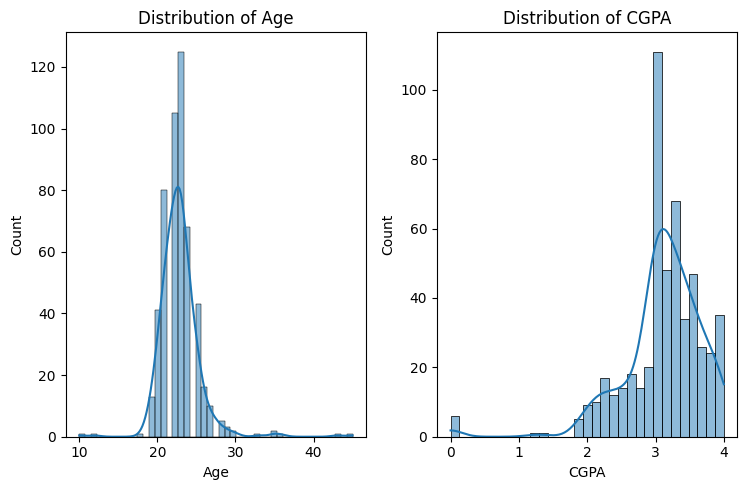

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Draw a histogram for each numerical column
for i, feature in enumerate(['Age', 'CGPA']):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
Academic_factors=['PoorAcademicPerformanceSelfPerception',
 'AcademicCriticismSelfPerception',
 'UnsatisfiedAcademicWorkloadSelfPerception',
 'NonInterestSubjectOpinion',
 'UnhappySubjectOpinion',
 'NonInterestInstitutionOpinion',
 'UnhappyInstitutionOpinion']

In [ ]:
Relation_factors=['ParentalUnderstanding',
 'SiblingBonding',
 'ParentalRelationshipStability',
 'PeerRelationship',
 'TeacherSupport',
 'PartnerRelationshipImpact']

In [ ]:
Pressure_factors = ['ParentalStrictness',
 'ParentalAcademicPressure',
 'ParentalMarriagePressure',
 'ParentalCareerPressure',
 'ParentalStudyAbroadPressure']

In [ ]:
Violence_factors = ['PhysicalViolenceExperience', 'SexualViolenceExperience',
                    'VerbalViolenceExperience', 'EmotionalViolenceExperience']

In [ ]:
df_visualize = df[Pressure_factors]
df_visualize.head(10)

,ParentalStrictness,ParentalAcademicPressure,ParentalMarriagePressure,ParentalCareerPressure,ParentalStudyAbroadPressure
0,Agree,Agree,Agree,Disagree,Disagree
1,Disagree,Disagree,Disagree,Disagree,Disagree
2,Neutral,Disagree,Neutral,Agree,Neutral
3,Neutral,Neutral,Neutral,Disagree,Disagree
4,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree
5,Neutral,Disagree,Disagree,Strongly disagree,Strongly disagree
6,Strongly agree,Agree,Strongly agree,Agree,Neutral
7,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
8,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree
9,Strongly agree,Disagree,Strongly disagree,Agree,Strongly disagree


In [ ]:
df_visualize.nunique()

ParentalStrictness             6
ParentalAcademicPressure       6
ParentalMarriagePressure       6
ParentalCareerPressure         6
ParentalStudyAbroadPressure    6
dtype: int64

In [ ]:
df_visualize.ParentalStrictness.unique()

array(['Agree', 'Disagree', 'Neutral', 'Strongly disagree',
       'Strongly agree', 'Not Applicable'], dtype=object)

## Academic factors

<Figure size 1900x1900 with 0 Axes>

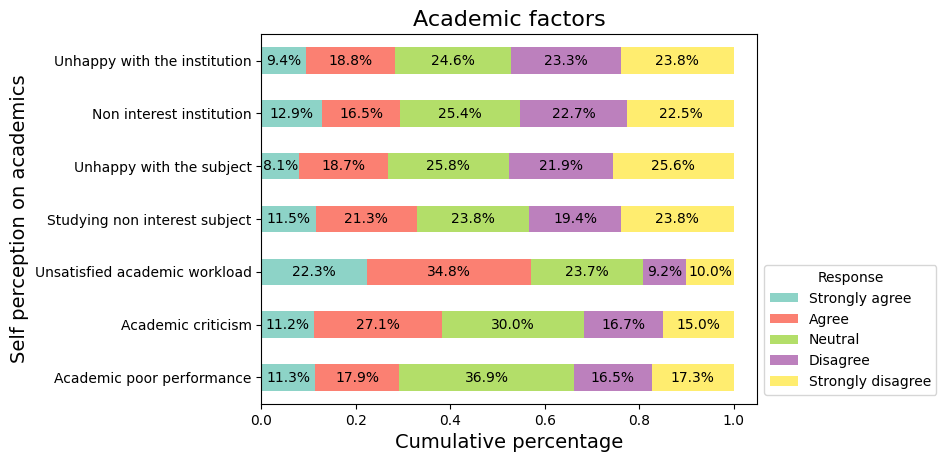

In [ ]:
features = Academic_factors
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree']  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['Academic poor performance',
 'Academic criticism',
 'Unsatisfied academic workload',
 'Studying non interest subject',
 'Unhappy with the subject',
 'Non interest institution',
 'Unhappy with the institution']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,19))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set3')

plt.xlabel('Cumulative percentage', fontsize=14)
plt.ylabel("Self perception on academics",fontsize=14)
plt.title('Academic factors', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

<Figure size 1200x800 with 0 Axes>

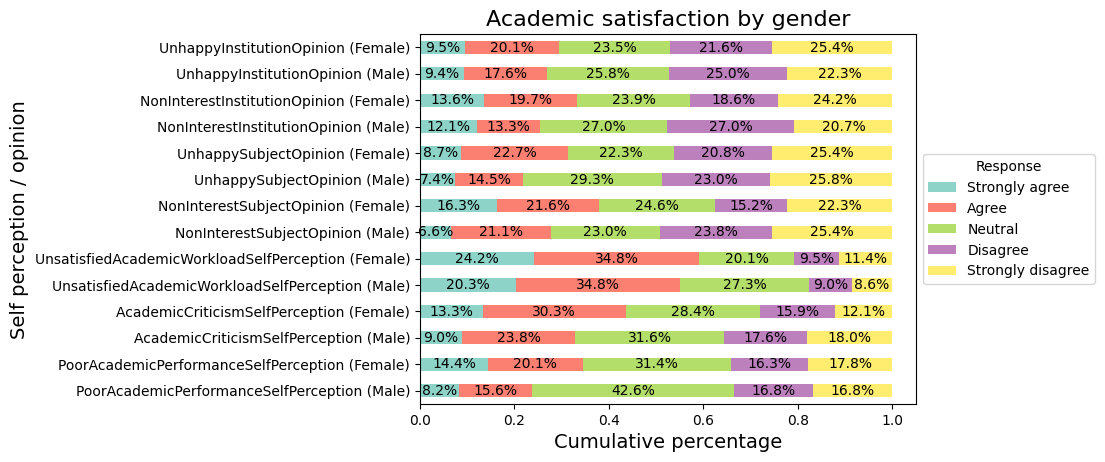

In [ ]:
features = Academic_factors
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree']  # Define categories in order.

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series_male = df[df['Gender'] == 'Male'][f].value_counts(normalize=True)
    count_series_female = df[df['Gender'] == 'Female'][f].value_counts(normalize=True)
    count_series_male = count_series_male.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    count_series_female = count_series_female.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f + ' (Male)'] = count_series_male
    counts_df[f + ' (Female)'] = count_series_female

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T


# Plot the stacked divided bar chart
plt.figure(figsize=(12, 8))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set3')

plt.xlabel('Cumulative percentage', fontsize=14)
plt.ylabel("Self perception / opinion",fontsize=14)
plt.title('Academic satisfaction by gender', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .5))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

## Relation factors

<Figure size 1900x1900 with 0 Axes>

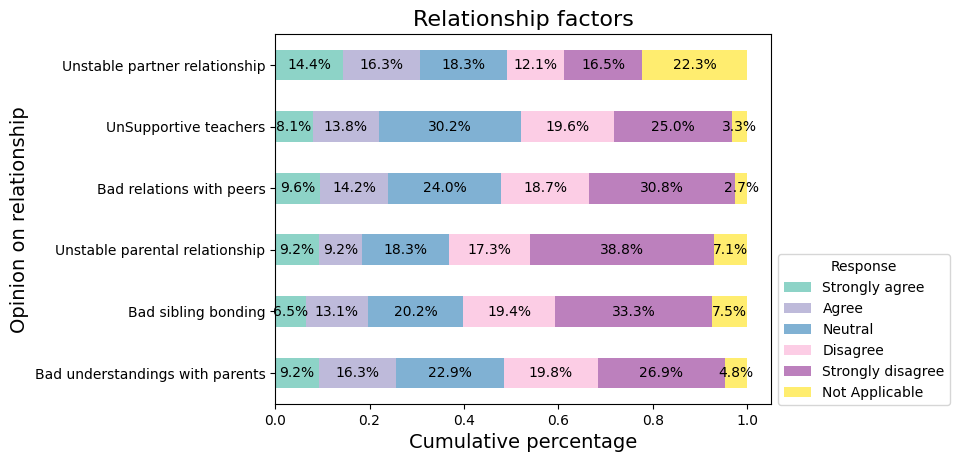

In [ ]:
features = Relation_factors
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree', 'Not Applicable']  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = [
 'Bad understandings with parents',
 'Bad sibling bonding',
 'Unstable parental relationship',
 'Bad relations with peers',
 'UnSupportive teachers',
 'Unstable partner relationship']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,19))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set3')

plt.xlabel('Cumulative percentage', fontsize=14)
plt.ylabel("Opinion on relationship",fontsize=14)
plt.title('Relationship factors', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

<Figure size 1200x800 with 0 Axes>

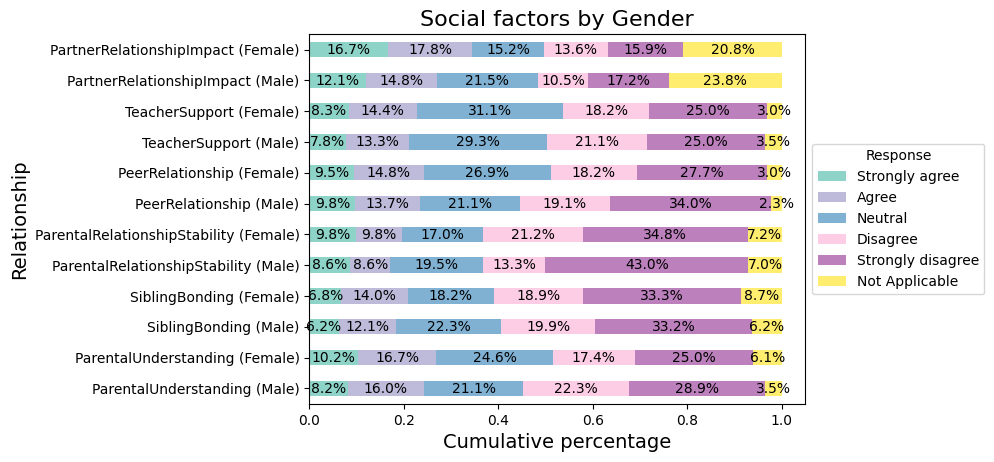

In [ ]:
features = Relation_factors
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree', 'Not Applicable']  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series_male = df[df['Gender'] == 'Male'][f].value_counts(normalize=True)
    count_series_female = df[df['Gender'] == 'Female'][f].value_counts(normalize=True)
    count_series_male = count_series_male.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    count_series_female = count_series_female.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f + ' (Male)'] = count_series_male
    counts_df[f + ' (Female)'] = count_series_female

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Plot the stacked divided bar chart
plt.figure(figsize=(12, 8))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set3')

plt.xlabel('Cumulative percentage', fontsize=14)
plt.ylabel("Relationship",fontsize=14)
plt.title('Social factors by Gender', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .5))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

## Pressure factors

<Figure size 1900x1900 with 0 Axes>

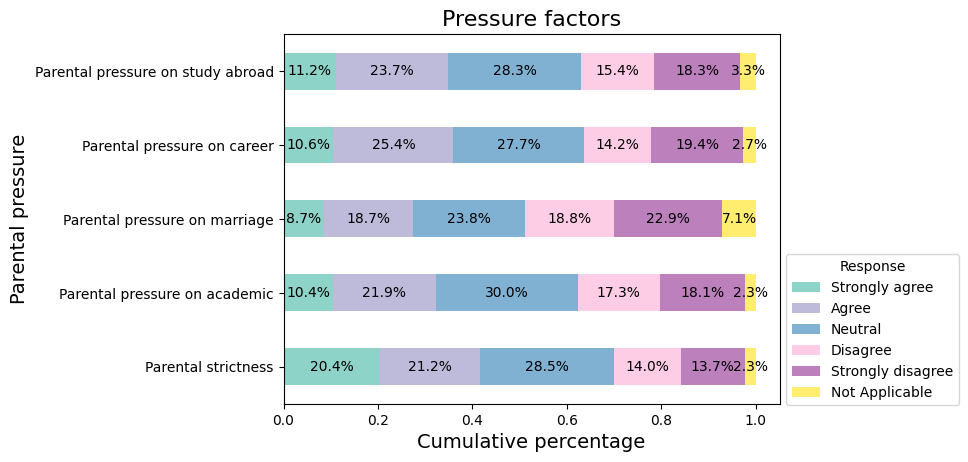

In [ ]:
features = Pressure_factors
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree', 'Not Applicable']  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['Parental strictness',
 'Parental pressure on academic',
 'Parental pressure on marriage',
 'Parental pressure on career',
 'Parental pressure on study abroad']
# Plot the stacked divided bar chart
plt.figure(figsize=(19,19))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set3')

plt.xlabel('Cumulative percentage', fontsize=14)
plt.ylabel("Parental pressure",fontsize=14)
plt.title('Pressure factors', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

##Violence

<Figure size 1900x1900 with 0 Axes>

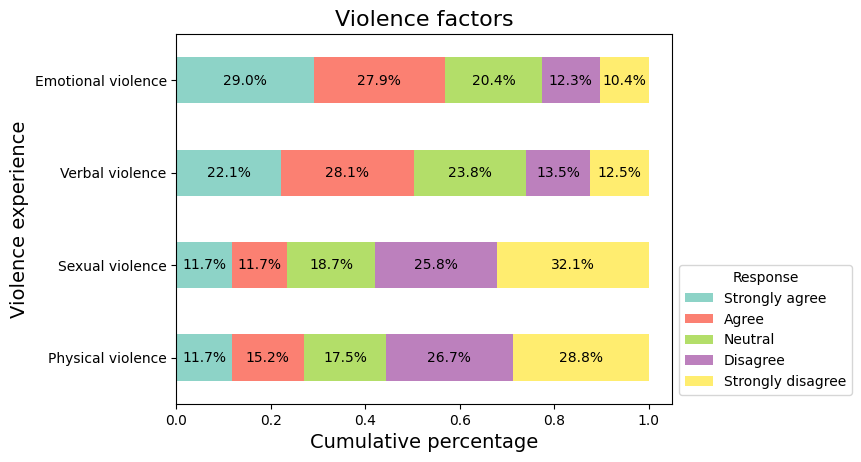

In [ ]:
features = Violence_factors
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree']  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['Physical violence', 'Sexual violence',
                  'Verbal violence', 'Emotional violence']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,19))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set3')

plt.xlabel('Cumulative percentage', fontsize=14)
plt.ylabel("Violence experience",fontsize=14)
plt.title('Violence factors', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

<Figure size 1200x800 with 0 Axes>

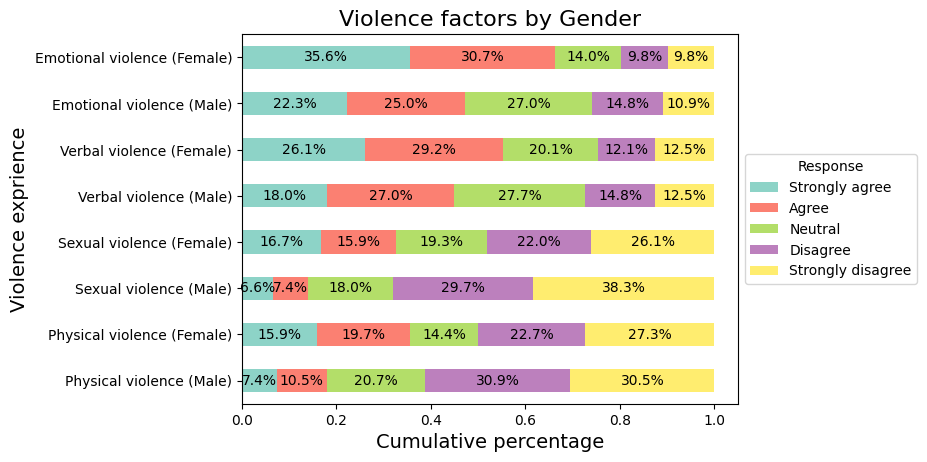

In [ ]:
features = Violence_factors
response_categories = ['Strongly agree','Agree','Neutral','Disagree', 'Strongly disagree']  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series_male = df[df['Gender'] == 'Male'][f].value_counts(normalize=True)
    count_series_female = df[df['Gender'] == 'Female'][f].value_counts(normalize=True)
    count_series_male = count_series_male.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    count_series_female = count_series_female.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f + ' (Male)'] = count_series_male
    counts_df[f + ' (Female)'] = count_series_female

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['Physical violence (Male)','Physical violence (Female)',
                   'Sexual violence (Male)', 'Sexual violence (Female)',
                  'Verbal violence (Male)', 'Verbal violence (Female)',
                   'Emotional violence (Male)','Emotional violence (Female)']

# Plot the stacked divided bar chart
plt.figure(figsize=(12, 8))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set3')

plt.xlabel('Cumulative percentage', fontsize=14)
plt.ylabel("Violence exprience",fontsize=14)
plt.title('Violence factors by Gender', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .5))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

#PHQ9 Scale

In [18]:
df_scale = df


df_scale['little interest']=  df['SatisfactionLevel'].replace({"I get as much satisfaction out of things as I used to.": 0,
                                                 "I don't enjoy things the way I used to.": 1,
                                                "I don't get real satisfaction out of anything anymore." : 2,
                                                "I am dissatisfied or bored with everything.": 3 })




df_scale["feeling down"] = df["Sadness"].replace({"I do not feel sad.": 0,
                                   "I feel sad": 1,
                                   "I am sad all the time and I can't snap out of it.": 2,
                                   "I am so sad and unhappy that I can't stand it.": 3})


df_scale['Sleeping issue']=  df['SleepQuality'].replace({ "I can sleep as well as usual.": 0,
                                    "I don't sleep as well as I used to.": 1,
                                    "I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.": 2,
                                    "I wake up several hours earlier than I used to and cannot get back to sleep.": 3 })


df_scale['feeling tired']=  df['Fatigue'].replace({ "I don't get more tired than usual.": 0,
                                    "I get tired more easily than I used to.": 1,
                                    "I get tired from doing almost anything.": 2,
                                    "I am too tired to do anything.": 3 })


df_scale['poor appetite']=  df['AppetiteLevel'].replace({ "My appetite is no worse than usual.": 0,
                                    "My appetite is not as good as it used to be.": 1,
                                    "My appetite is much worse now.": 2,
                                    "I have no appetite at all anymore.": 3 })

df_scale['feeling bad']=  df['FearOfFailure'].replace({ 'I do not feel like a failure.':0,
                                        'I feel I have failed more than the average person.':1,
                                        'As I look back on my life, all I can see is a lot of failures.' :2,
                                        'I feel I am a complete failure as a person.':3})

df_scale['trouble concertrating']=  df['DecisionMaking'].replace({ "I make decisions about as well as I ever could.": 0,
                                    "I put off making decisions more than I used to.": 1,
                                    "I have greater difficulty in making decisions more than I used to.": 2,
                                    "I can't make decisions at all anymore.": 3 })


df_scale['slowness']=  df['Agitation'].replace({"None.": 0,
                                                "Fidgetiness/ (অস্থিরতা)":1 ,
                                                "Playing with hands, hair, etc.":2,
                                                "Moving about, can’t sit still.": 3,
                                                "Hand wringing/(হাত মোচড়ানো), nail biting, hair-pulling, biting of lips.": 3 })



df_scale['self harm']=  df['SuicidalFeelings'].replace({ "Absent.": 0,
                                    "Feels life is not worth living.(জীবন নিরর্থক মনে হওয়া)": 1,
                                    "Wishes he/she were dead or any thoughts of possible death to self.(মৃত্যুর ইচ্ছা/চিন্তা)": 2,
                                    "Ideas or gestures of suicide.(আত্মহত্যার ধারনা পোষণ করা)" : 3,
                                    "Attempts at suicide.(আত্মহত্যার চেষ্টা)" :3})




df_scale.head(5)

,Participation,Age,Gender,Degree,AcademicYear,SchoolMedium,Department,CGPA,DepressionHistory,RelationshipStatus,...,SelfPerception,little interest,feeling down,Sleeping issue,feeling tired,poor appetite,feeling bad,trouble concertrating,slowness,self harm
0,Yes,23,Female,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.38,No,Single,...,Denies being ill at all.,0,1,1,0,0,1,0,1,0
1,Yes,24,Female,Postgraduate,1,English Medium,Business & Economics Studies,3.08,Yes,Single,...,Denies being ill at all.,1,0,1,0,1,1,0,0,0
2,Yes,24,Male,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.05,Yes,Prefer not to say,...,Acknowledges being depressed and ill.,0,1,0,0,0,0,0,1,0
3,Yes,22,Male,Postgraduate,1,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.82,Yes,Single,...,Denies being ill at all.,0,1,0,1,0,1,0,0,1
4,Yes,25,Male,Undergraduate,4,Bangla Medium,Business & Economics Studies,3.40,Yes,Single,...,Acknowledges being depressed and ill.,1,1,1,0,2,0,1,3,1


In [19]:
# Selecting only the altered columns and dropping the rest
df_scale = df_scale.loc[:, ['little interest', 'feeling down', 'Sleeping issue', 'feeling tired',
                            'poor appetite', 'feeling bad', 'trouble concertrating', 'slowness',
                            'self harm']]


In [20]:
df_scale.columns.tolist()

['little interest',
 'feeling down',
 'Sleeping issue',
 'feeling tired',
 'poor appetite',
 'feeling bad',
 'trouble concertrating',
 'slowness',
 'self harm']

In [21]:
#printing total score
df_scale['TotalScore'] = df_scale[[col for col in df_scale.columns]].sum(axis=1)
df_scale.head()

,little interest,feeling down,Sleeping issue,feeling tired,poor appetite,feeling bad,trouble concertrating,slowness,self harm,TotalScore
0,0,1,1,0,0,1,0,1,0,4
1,1,0,1,0,1,1,0,0,0,4
2,0,1,0,0,0,0,0,1,0,2
3,0,1,0,1,0,1,0,0,1,4
4,1,1,1,0,2,0,1,3,1,10


In [22]:
# Assign an empty list to store the ratings
depression_Level = []

# Iterate over each value in the 'TotalScore' column of the 'df_scale' dataframe
for row in df_scale['TotalScore']:

    if row <= 4:
        depression_Level.append('Minimal')

    elif row <= 9:
        depression_Level.append('Mild')

    elif row <= 14:
        depression_Level.append('Moderate')

    elif row <= 19:
        depression_Level.append('ModeratelySevere')

    else:
        depression_Level.append('Severe')

# Assign the ratings list to a new column called 'DepressionLevel' in the 'df_scale' dataframe
df_scale['DepressionLevel'] = depression_Level

df_scale.drop(columns = 'TotalScore', inplace = True)
print(df_scale.shape)
df_scale.head()

(520, 10)


,little interest,feeling down,Sleeping issue,feeling tired,poor appetite,feeling bad,trouble concertrating,slowness,self harm,DepressionLevel
0,0,1,1,0,0,1,0,1,0,Minimal
1,1,0,1,0,1,1,0,0,0,Minimal
2,0,1,0,0,0,0,0,1,0,Minimal
3,0,1,0,1,0,1,0,0,1,Minimal
4,1,1,1,0,2,0,1,3,1,Moderate


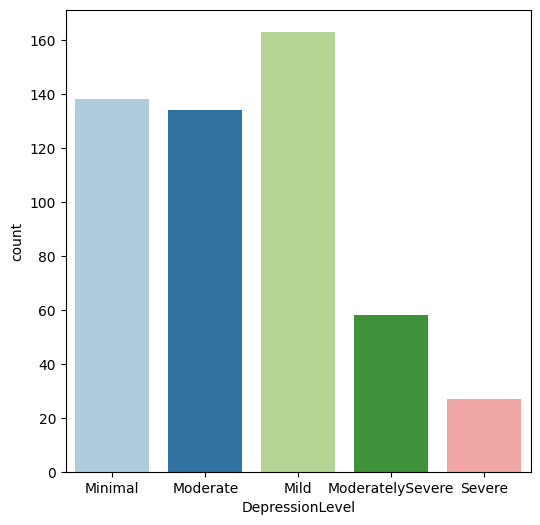

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 6))
sns.countplot(x = df_scale['DepressionLevel'],palette='Paired' )
plt.show()

## Merginng the dataset (All + PHQ)

In [24]:
df1 = df[['Age','Gender','CGPA','PoorAcademicPerformanceSelfPerception',
 'AcademicCriticismSelfPerception',
 'UnsatisfiedAcademicWorkloadSelfPerception',
 'NonInterestSubjectOpinion',
 'UnhappySubjectOpinion',
 'NonInterestInstitutionOpinion',
 'UnhappyInstitutionOpinion','ParentalUnderstanding',
 'SiblingBonding',
 'ParentalRelationshipStability',
 'PeerRelationship',
 'TeacherSupport',
 'PartnerRelationshipImpact','PhysicalViolenceExperience', 'SexualViolenceExperience', 'VerbalViolenceExperience', 'EmotionalViolenceExperience']]

In [25]:
df2 = df_scale

In [26]:
# Concatenate dataframes horizontally
df_merged = pd.concat([df1, df2], axis=1)

In [27]:
df_merged.head()

,Age,Gender,CGPA,PoorAcademicPerformanceSelfPerception,AcademicCriticismSelfPerception,UnsatisfiedAcademicWorkloadSelfPerception,NonInterestSubjectOpinion,UnhappySubjectOpinion,NonInterestInstitutionOpinion,UnhappyInstitutionOpinion,...,little interest,feeling down,Sleeping issue,feeling tired,poor appetite,feeling bad,trouble concertrating,slowness,self harm,DepressionLevel
0,23,Female,3.38,Disagree,Disagree,Neutral,Strongly disagree,Strongly disagree,Disagree,Strongly disagree,...,0,1,1,0,0,1,0,1,0,Minimal
1,24,Female,3.08,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,...,1,0,1,0,1,1,0,0,0,Minimal
2,24,Male,3.05,Neutral,Neutral,Agree,Agree,Neutral,Neutral,Disagree,...,0,1,0,0,0,0,0,1,0,Minimal
3,22,Male,3.82,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Agree,...,0,1,0,1,0,1,0,0,1,Minimal
4,25,Male,3.40,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,...,1,1,1,0,2,0,1,3,1,Moderate


In [ ]:
# df_merged.to_csv('AIDA-PHQ.csv', index=False)

In [28]:
data=df_merged

###visualizing the distribution of depression levels across different age groups and genders.

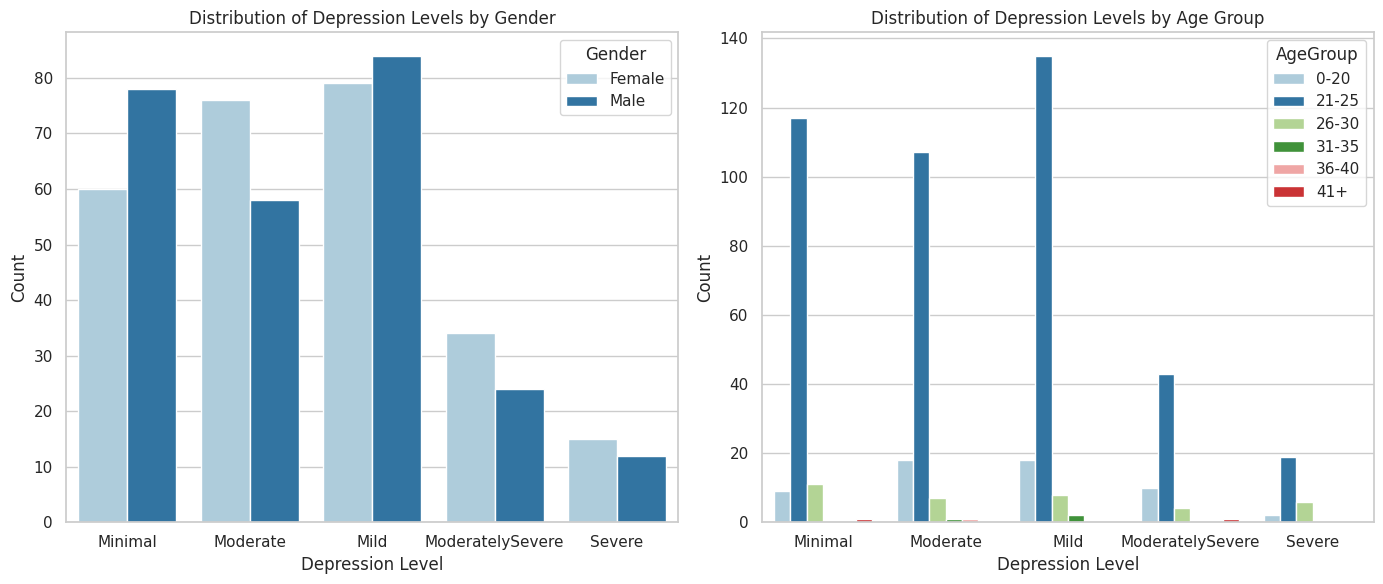

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Distribution of Depression Levels by Gender
sns.countplot(ax=axes[0], x='DepressionLevel', hue='Gender', data=data, palette='Paired')
axes[0].set_title('Distribution of Depression Levels by Gender')
axes[0].set_xlabel('Depression Level')
axes[0].set_ylabel('Count')

# Plot 2: Distribution of Depression Levels by Age Group
# Creating age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 20, 25, 30, 35, 40, 100], labels=['0-20', '21-25', '26-30', '31-35', '36-40', '41+'])
sns.countplot(ax=axes[1], x='DepressionLevel', hue='AgeGroup', data=data, palette='Paired')
axes[1].set_title('Distribution of Depression Levels by Age Group')
axes[1].set_xlabel('Depression Level')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


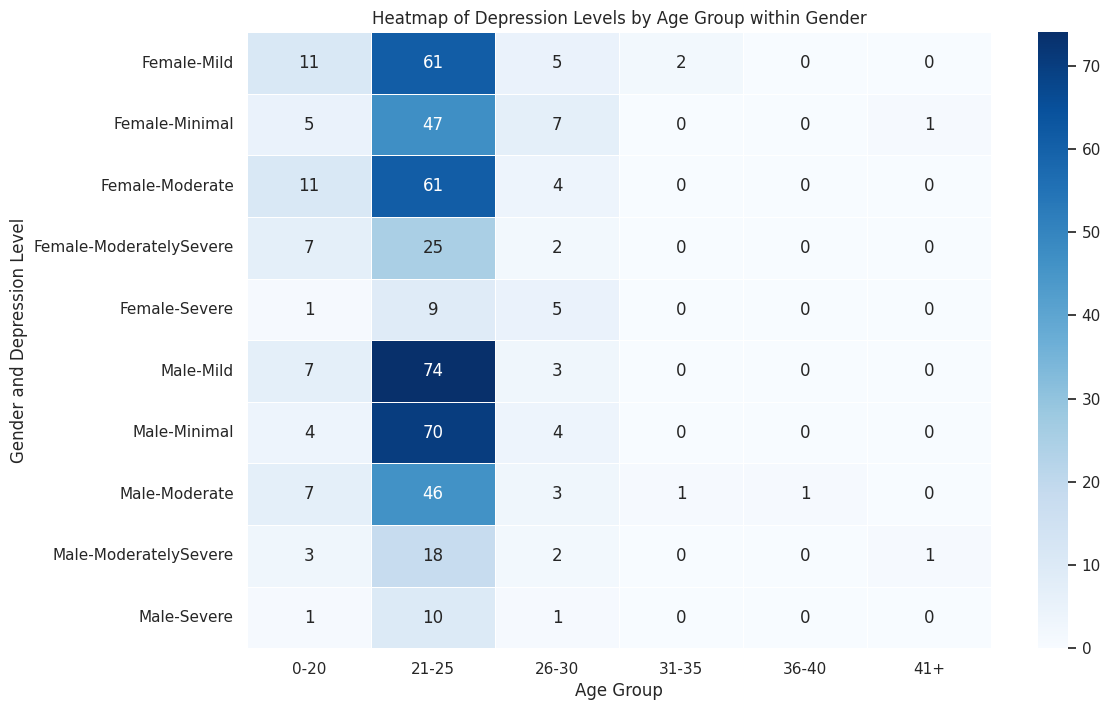

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 20, 25, 30, 35, 40, 100], labels=['0-20', '21-25', '26-30', '31-35', '36-40', '41+'])

# Creating a pivot table to calculate counts for each combination of depression level, gender, and age group
pivot_table = data.pivot_table(index=['Gender', 'DepressionLevel'], columns='AgeGroup', aggfunc='size', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", linewidths=.5, cmap='Blues')
plt.title('Heatmap of Depression Levels by Age Group within Gender')
plt.xlabel('Age Group')
plt.ylabel('Gender and Depression Level')
plt.show()


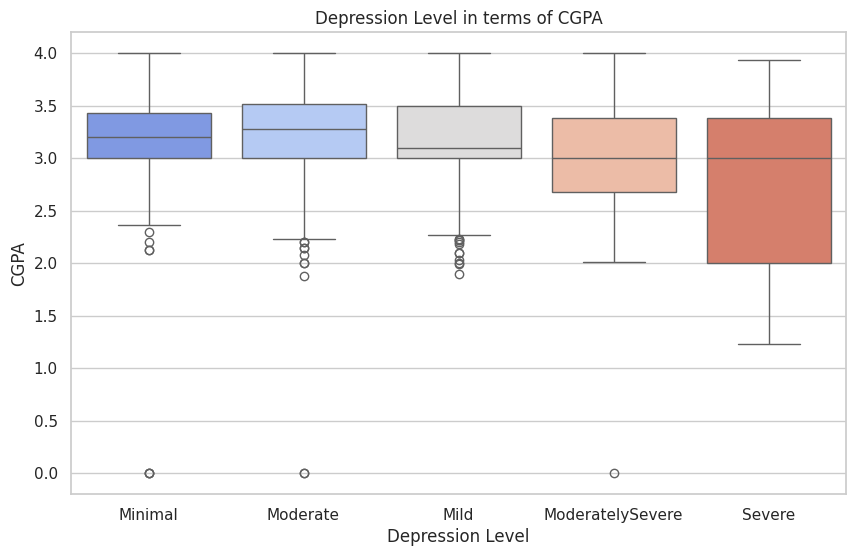

In [ ]:
# Plotting CGPA vs. Depression Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='DepressionLevel', y='CGPA', data=data, palette='coolwarm')
plt.title('Depression Level in terms of CGPA')
plt.xlabel('Depression Level')
plt.ylabel('CGPA')
plt.show()
